In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Sneaker', 'Bag', 'Ankle boot']

print("Setul de instruire", train_images.shape)
print("Numarul de imagini in setul de instruire", len(train_labels))
print("Cum arata etichetele din setul de instruire", train_labels)
print("Setul de testare", test_images.shape)
print("Numarul de imagini in setul de date", len(test_labels))

2.12.0
Setul de instruire (60000, 28, 28)
Numarul de imagini in setul de instruire 60000
Cum arata etichetele din setul de instruire [9 0 0 ... 3 0 5]
Setul de testare (10000, 28, 28)
Numarul de imagini in setul de date 10000


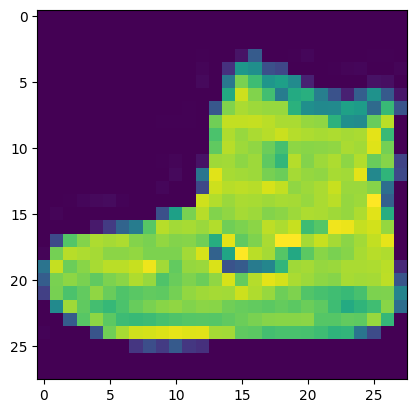

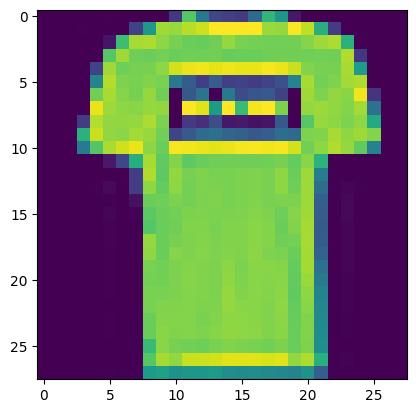

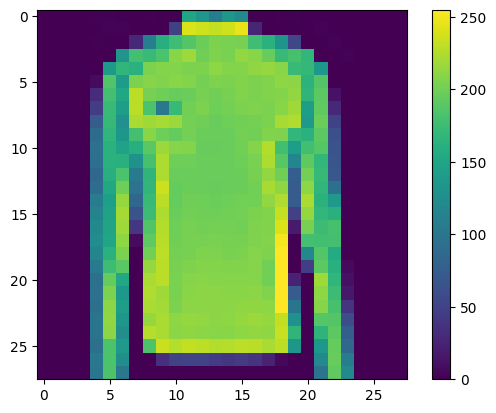

In [ ]:
plt.figure(1)
plt.imshow(train_images[0])
plt.figure(2)
plt.imshow(train_images[1])
plt.figure(1002)
plt.imshow(train_images[1002])
plt.colorbar()
plt.grid(False)
plt.show()

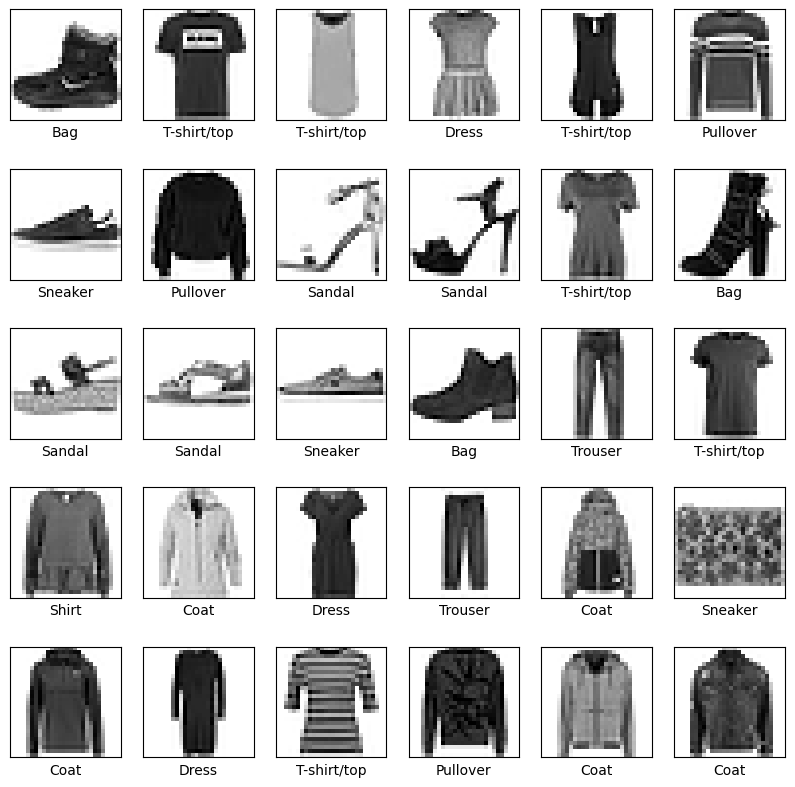

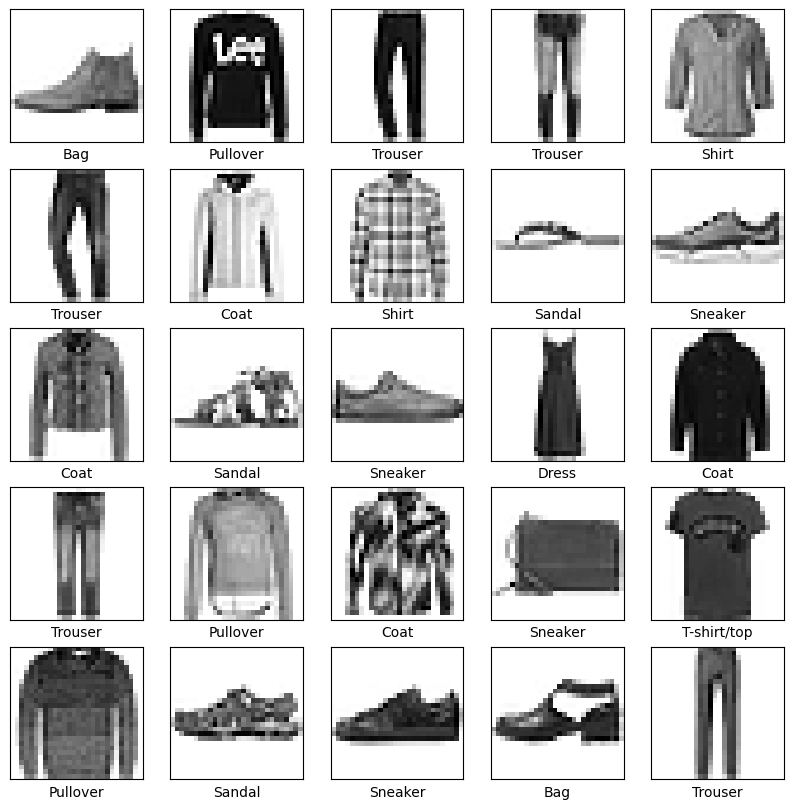

In [ ]:
"""
Scalam valorile = normalizare
"""

train_images = train_images / 255.0
test_images = test_images/ 255.0

#afisam primele 30 imagini din clasa de instruire
plt.figure("Din set instruire", figsize=(10,10))
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

#afisam 25 de imagini din setul de testare de la 1000 la 1025
plt.figure("Din set testare", figsize=(10,10))
i = 1000
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[test_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

#evaluare acuratete
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy", test_acc)

#de aici modelul este anrentat si se poate folosi pentru predictii
"""iesirea este de tip logits de aceea se face o transformare
inprobabilitati, care sunt mai usor de interpretat"""
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

#pentru prima imbracaminte din lista
print(predictions[0])

print(np.argmax(predictions[0]))

#pentru imbracamintea 100 din lista

print(predictions[99])
print(np.argmax(predictions[99]))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4178 - accuracy: 0.8532
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4114 - accuracy: 0.8554
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4059 - accuracy: 0.8571
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4004 - accuracy: 0.8594
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3948 - accuracy: 0.8598
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3906 - accuracy: 0.8629
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3860 - accuracy: 0.8629
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3822 - accuracy: 0.8654
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3782 - accuracy: 0.8666
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

In [ ]:
#examinarm eticheta de testare
print(test_labels[0])
print(test_labels[99])

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

9
2


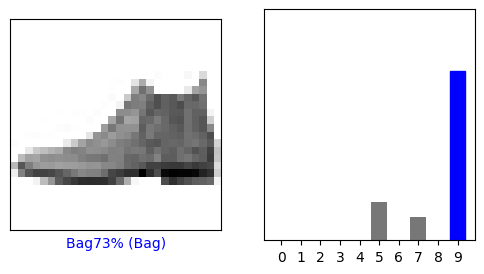

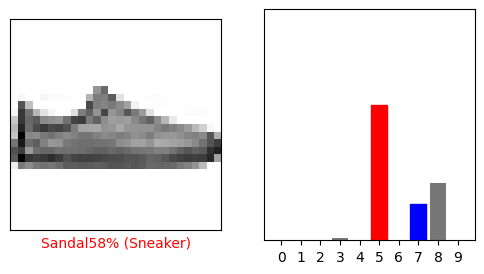

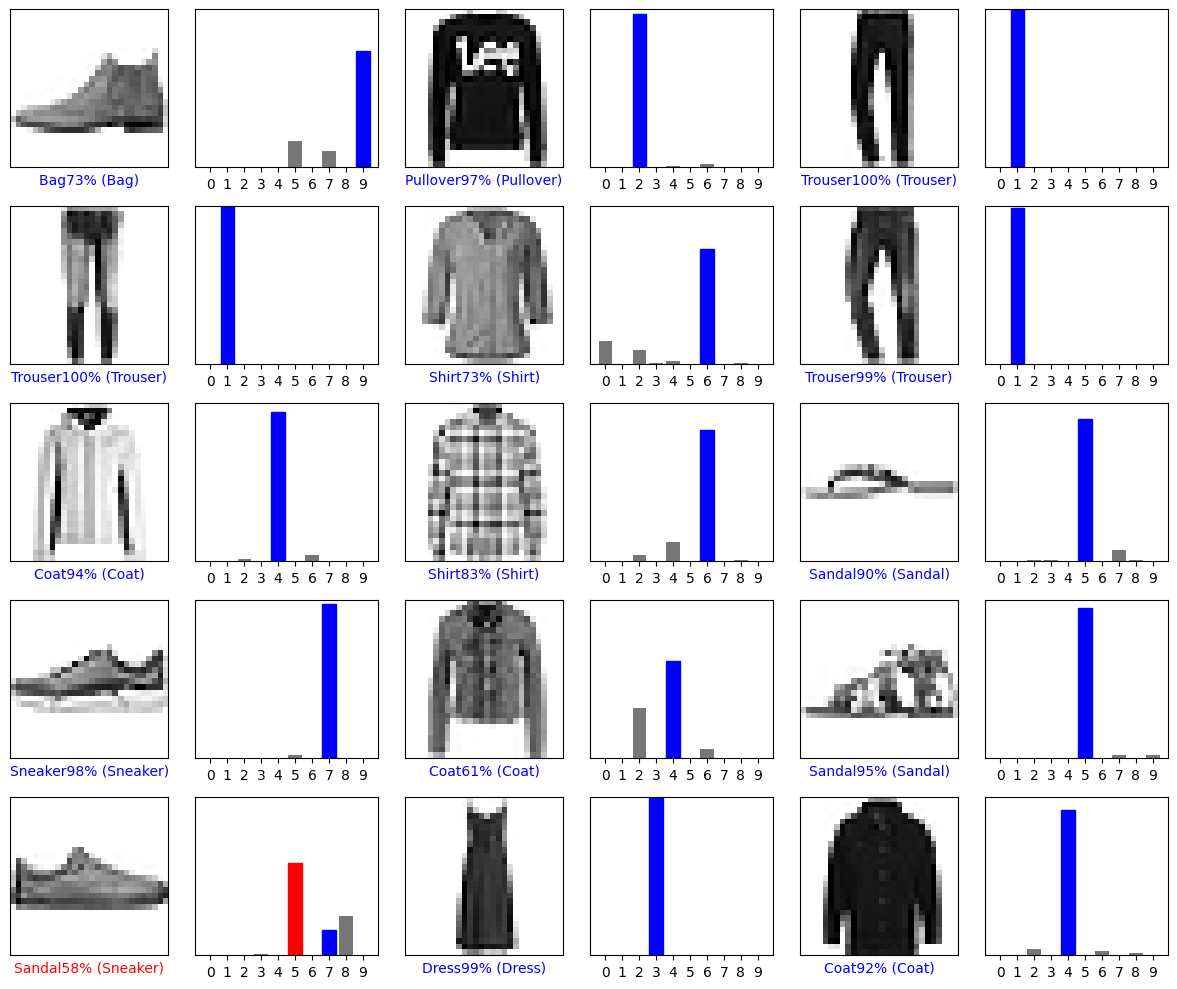

(28, 28)
(1, 28, 28)


In [ ]:
"""Modelul odata instruit poate fii folosit pentru a face predictii despre unele imagini.
Sa analizam prima sia 13-a imagine, predictiile si matricea de predictii
Etichetele de predictie corecte sunt albastre si etichetele de predictie incorecte sunt rosii
Numarul indica procentajul (din 100) pentru eticheta prezisa."""

i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

#afisam mai multe imagini
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

img = test_images[1]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

1/1 [==============================] - 0s 22ms/step
[[3.4793685e-04 3.9345591e-07 9.7090673e-01 5.9334852e-06 8.6670509e-03
  1.3309591e-10 2.0032907e-02 4.6157377e-18 3.8985643e-05 5.9044105e-13]]
2


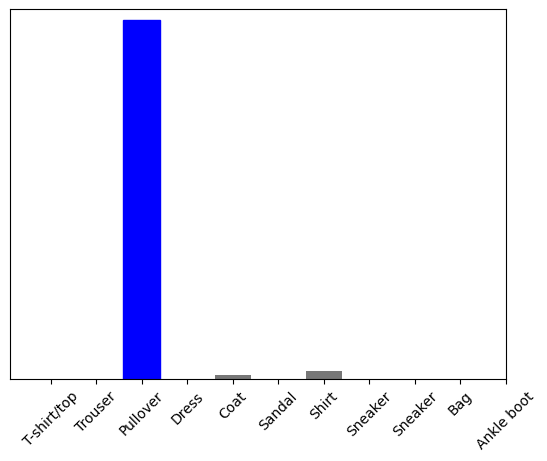

In [ ]:
predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_=plt.xticks(range(11), class_names, rotation=45)
print(np.argmax(predictions_single[0]))